In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('all_kindle_review.csv')
df.head(2)

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400


In [ ]:
messages=df[['reviewText','rating']]  #Considering only the important features
messages.head(2)

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5


In [4]:
messages['rating']=(messages['rating']>3).astype(int)  # postive review is 1 and negative review is 0
messages.head(2)

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",0
1,Great short read. I didn't want to put it dow...,1


In [5]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()  #Lemmatizer

In [6]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['reviewText'][i]) #replacing all characters with blank except alphabets
    review = review.lower() #Converting to Lower Case
    review = review.split() #Spliting the words
    review = [lemmatizer.lemmatize(word) for word in review] #Lemmatizing the words
    review = ' '.join(review)
    corpus.append(review)

In [12]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [13]:
#Getting all the words from each sentences
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [14]:
import gensim

In [15]:
model=gensim.models.Word2Vec(words,vector_size=100,min_count=5)

In [ ]:
model.corpus_count  

12000

In [17]:
import numpy as np

In [ ]:
def avg_word2vec(doc):    
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
                #or [np.zeros(len(model.wv.index_to_key))], axis=0)

In [19]:
#apply for the entire sentences
X=[]
for i in range(len(words)):
    X.append(avg_word2vec(words[i]))

In [20]:
len(X)

12000

In [21]:
rows = []

for i in range(len(X)):
    if isinstance(X[i], np.ndarray):  # adjust shape if needed
        rows.append(X[i])  # collect arrays

df = pd.DataFrame(rows)  # create dataframe all at once


In [22]:
df.shape

(12000, 100)

In [23]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int64

In [ ]:
#Creating Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,messages['rating'],test_size=0.20)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [28]:
models={
    "Gaussian Naive Bayes":GaussianNB(),
    "AdaBoost Classifier":AdaBoostClassifier(),
    "Random Forest":RandomForestClassifier(),
    }
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall



    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
   

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    

    
    print('='*35)
    print('\n')

Gaussian Naive Bayes
Model performance for Training set
- Accuracy: 0.7274
- F1 score: 0.7271
- Precision: 0.7401
- Recall: 0.6965
----------------------------------
Model performance for Test set
- Accuracy: 0.7300
- F1 score: 0.7299
- Precision: 0.7528
- Recall: 0.7012




c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.7823
- F1 score: 0.7822
- Precision: 0.7879
- Recall: 0.7694
----------------------------------
Model performance for Test set
- Accuracy: 0.7617
- F1 score: 0.7616
- Precision: 0.7639
- Recall: 0.7714


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7654
- F1 score: 0.7654
- Precision: 0.7749
- Recall: 0.7616




In [29]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [30]:
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   
                   ]

In [ ]:
#Hyper Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
81 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\skle

---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 8, 'max_features': 7, 'max_depth': None}


In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

Accuracy score= 0.7716666666666666


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28276\821679948.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


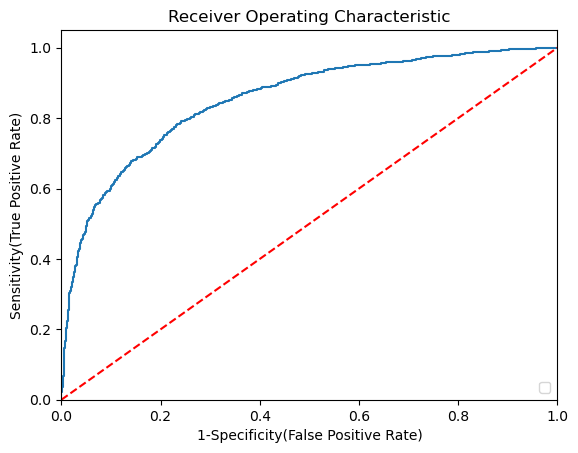

In [36]:
rf_model=RandomForestClassifier(n_estimators=500,min_samples_split=8,max_features=7,max_depth=None)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print('Accuracy score=',accuracy_score(y_pred,y_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

In [ ]:
#The accuracy increases substantially and is quite satisfactory. Moreover from the ROC-AUC curve , we can claim that is seems to be a good fit